## Tutors - expected math exam results

In [126]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor # только для бустинга
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
df_train = pd.read_csv('train.csv', index_col = 'Id')
df_test = pd.read_csv('test.csv', index_col = 'Id')

In [128]:
df_train.shape

(10000, 11)

In [129]:
df_train.head()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
Id,,,,,,,,,,,
0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0
1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0
2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0


In [130]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,10000.0,45.8780,8.043929,23.0,40.0,46.0,51.0,68.0
years_of_experience,10000.0,1.9868,1.772213,0.0,0.0,2.0,3.0,10.0
lesson_price,10000.0,1699.1050,524.886654,200.0,1300.0,1500.0,2150.0,3950.0
qualification,10000.0,1.7195,0.792264,1.0,1.0,2.0,2.0,4.0
physics,10000.0,0.3750,0.484147,0.0,0.0,0.0,1.0,1.0
chemistry,10000.0,0.1329,0.339484,0.0,0.0,0.0,0.0,1.0
biology,10000.0,0.1096,0.312406,0.0,0.0,0.0,0.0,1.0
english,10000.0,0.0537,0.225436,0.0,0.0,0.0,0.0,1.0
geography,10000.0,0.0321,0.176274,0.0,0.0,0.0,0.0,1.0
history,10000.0,0.0194,0.137933,0.0,0.0,0.0,0.0,1.0


In [131]:
X = df_train.drop(columns=['mean_exam_points'], inplace = False)
y = df_train['mean_exam_points']

In [132]:
def my_hist(x, figsize=(12, 3)):
    ''' Гистограмма + медиана/мода/средн.арифм. '''
    target_mean = round(x.mean(), 2)
    target_median = x.median()
    target_mode = x.mode()[0]

    plt.figure(figsize=figsize)

    sns.histplot(x, bins=min(20,len(set(x.unique()))))

    plt.axvline(x=[target_mean], label='mean',
                linestyle=':', color="red", linewidth=4)
    plt.axvline(x=[target_median], label='median',
                linestyle='--', color="green", linewidth=4)
    plt.axvline(x=[target_mode], label='mode',
                linestyle='-.', color="brown", linewidth=4)

    plt.title(f'Distribution of {x.name}')
    plt.xlabel(x.name)
    plt.ylabel('Frequency')
    plt.show()

**Исследуем признаки**

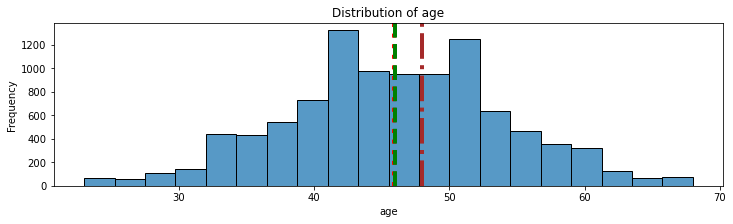

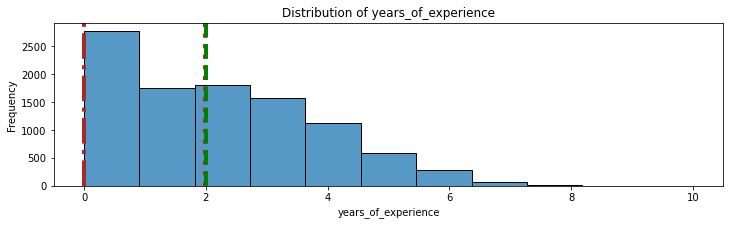

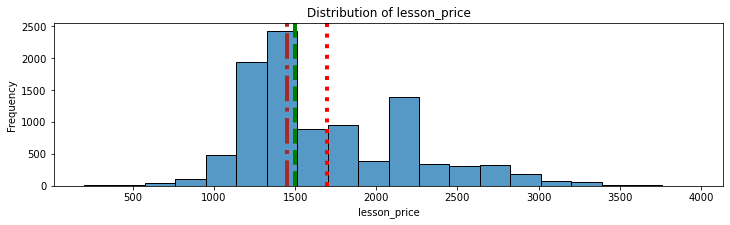

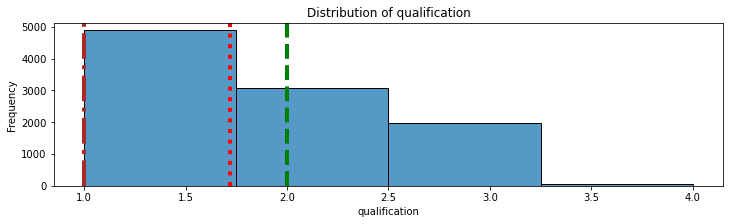

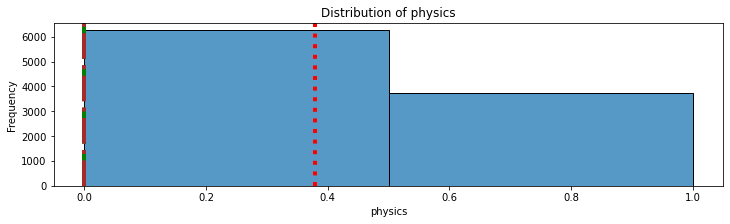

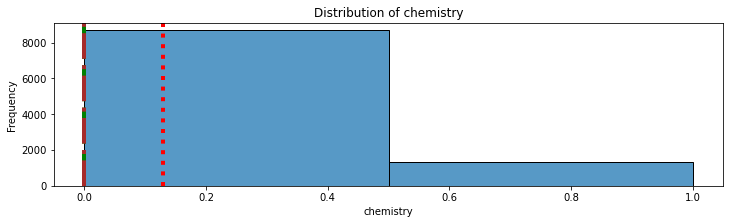

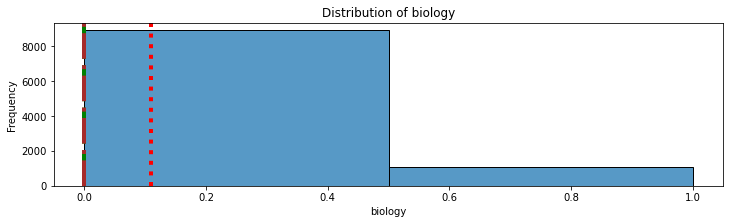

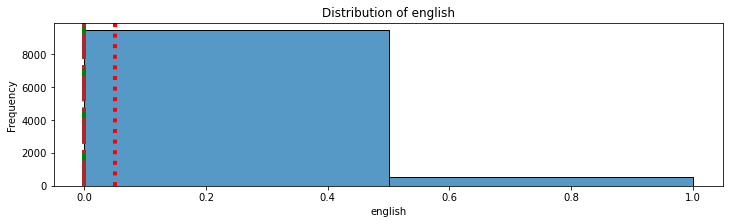

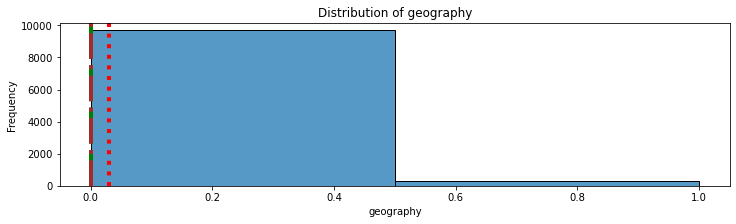

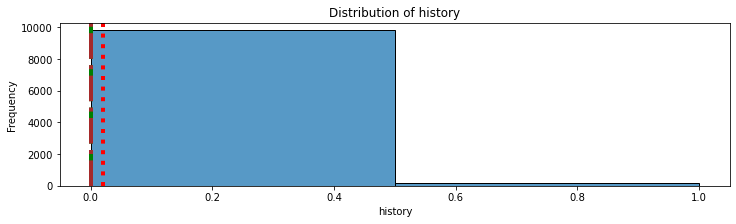

In [133]:
for feature in X:
    my_hist(X[feature])

**Построим график корреляций признаков с целевой переменной**

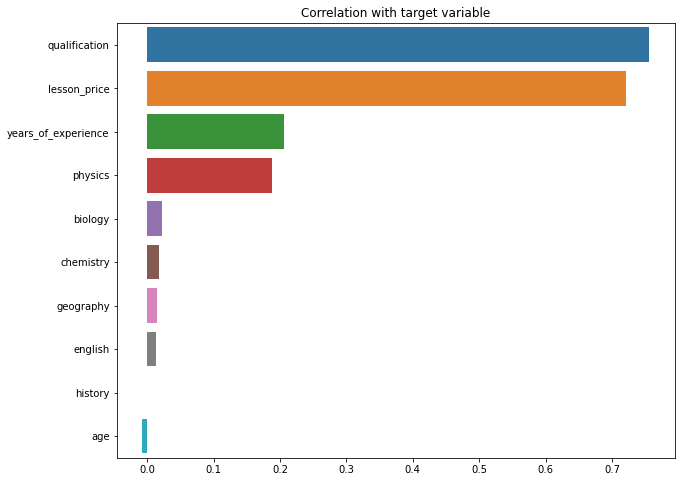

In [134]:
corr_with_target = df_train.corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

**Построим доверительные интервалы для признаков в разрезе целевой переменной**

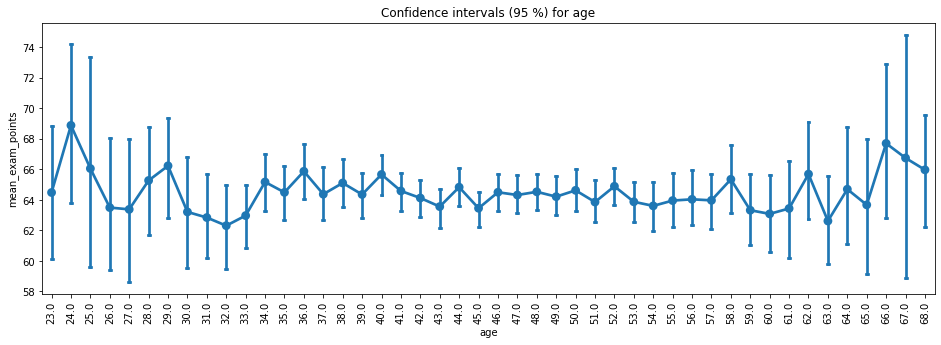

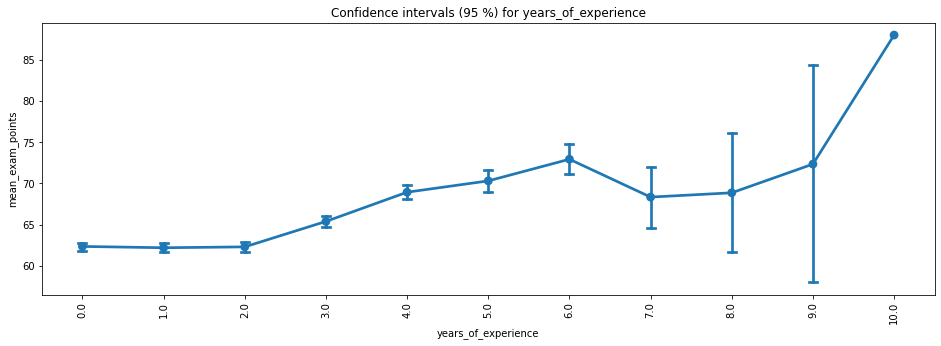

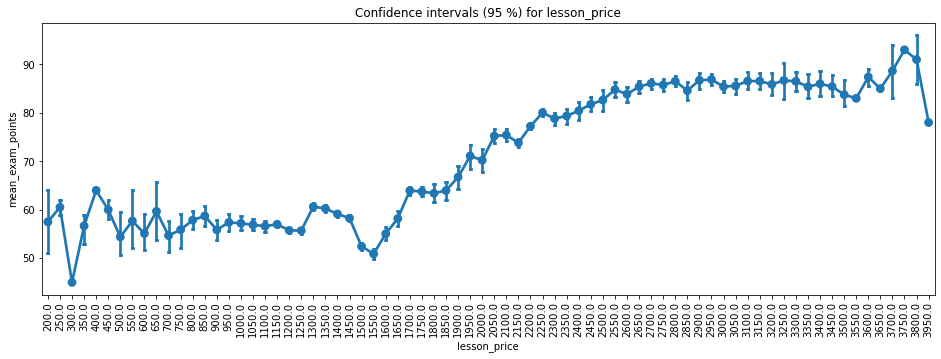

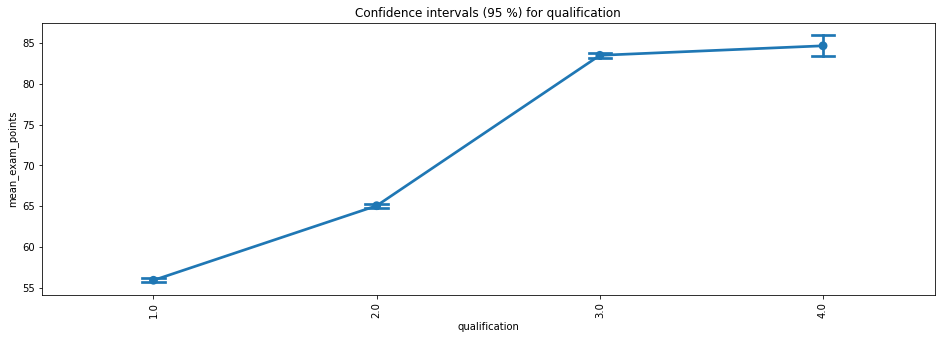

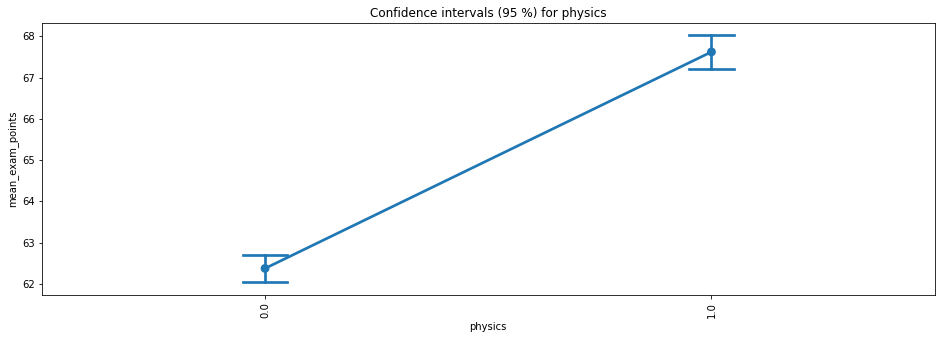

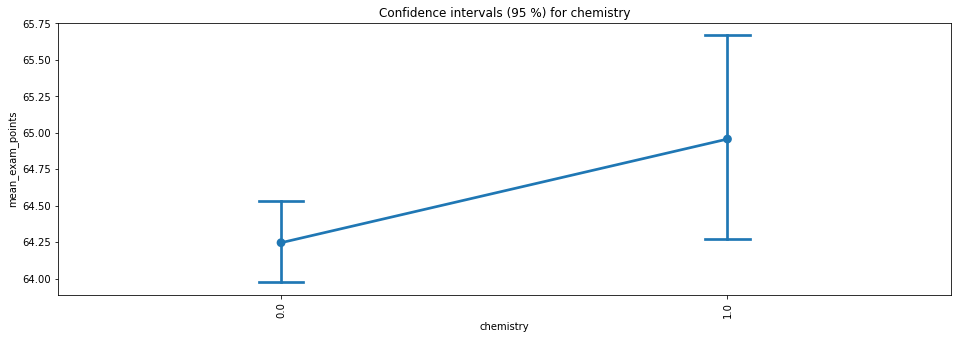

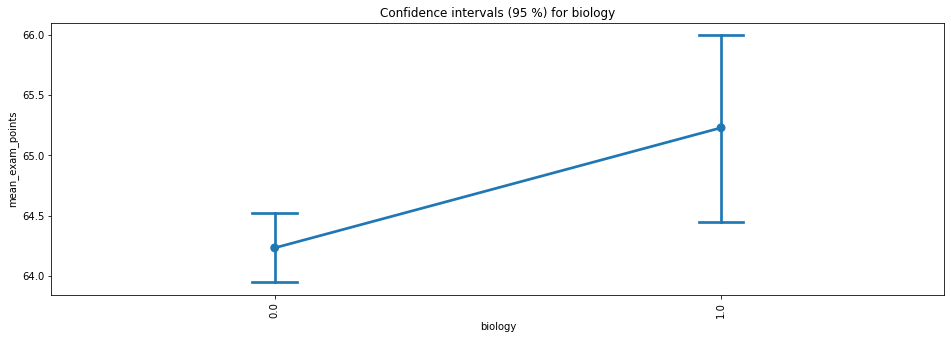

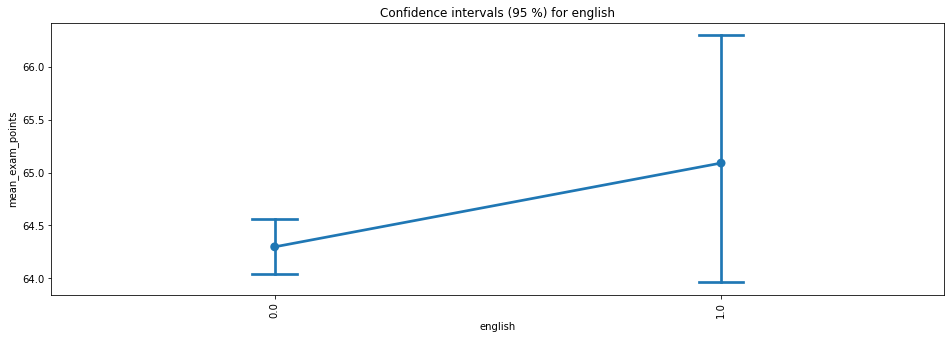

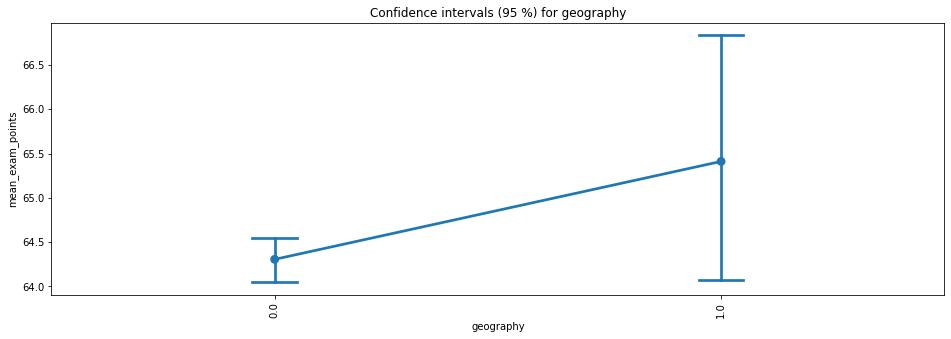

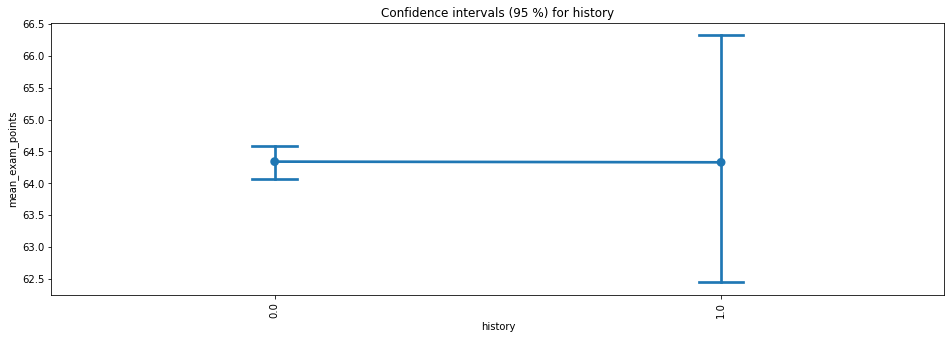

In [135]:
for feature in X:
    plt.figure(figsize=(16, 5))

    sns.pointplot(x=feature, y='mean_exam_points', join=True, data=df_train, capsize=.1)

    plt.title(f'Confidence intervals (95 %) for {feature}')
    plt.xticks(rotation=90)
    plt.show()

Сильными по разделению признаками являются "квалификация", "физика" и, относительно, "цена урока". Причем признак "цена урока" можно сгруппировать по нескольким группам (lesson_price<1650, 1700-1900, 1950-2000, 2050-2200, 2250-2500, >2550).

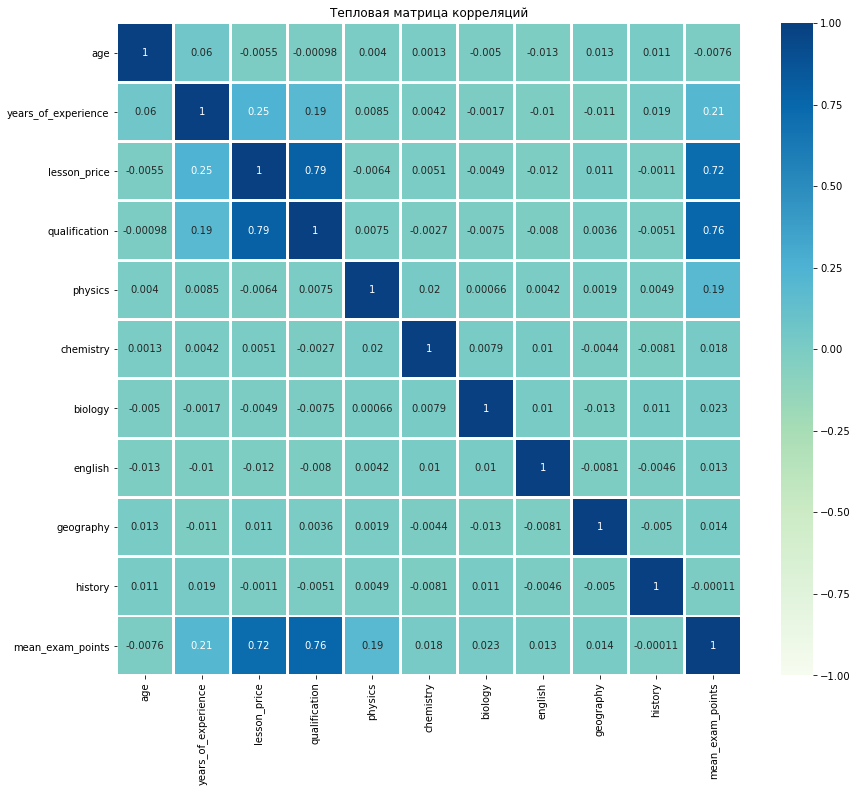

In [136]:
plt.rcParams['figure.figsize'] = (14.0, 12.0)
sns.heatmap(df_train.corr(), annot = True,fmt='.2g', vmin=-1, vmax=1, center= 0, linewidths = 2, cmap = 'GnBu')
plt.title('Тепловая матрица корреляций')
plt.show()

**TODO Здесь преполагается сравнить признаки df_test и df_train по критерию Манна-Уитни, в случае если часть признаков в выборках не похожа, от них следует избавиться**

P.S. Не релизовано

**Сделаем метрику для проверки качества модели.**

In [137]:
# качество модели будем определять по метрике R2
def r2_score(y, y_hat):
    y = np.array(y)
    y_hat = np.array(y_hat)
    return 1 - np.sum((y - y_hat)**2)/np.sum((y - y.mean())**2)

**TODO определение лучших параметров модели**

In [138]:
def GridSearch(model, parameters, metric='R2'):
    return best_parameters

**TODO Сделать в виде класса**

In [153]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании 
    # прибавляются с шагом eta
    return np.array([sum([
        eta * coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) 
                     for x in X])

In [140]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction) ** 2)) / len(y_real)

In [141]:
def bias(z, y):
    return 2 * (z - y)

In [152]:
def sgb_fit(n_trees, max_depth, min_samples_leaf, X_train, X_test, y_train, y_test, coefs, eta, sgb_subsample=0.5):
    
    # eta - скорость обучения
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # алгоритмы начиная со второго обучаем на сдвиг на подвыборке
            subsample_indexes = np.random.choice(range(len(X_train)), int(len(X_train) * sgb_subsample), replace=False)
            # Получим ответы на текущей композиции
            target = gb_predict(X_train[subsample_indexes], trees, coefs, eta)
            tree.fit(X_train[subsample_indexes], bias(y_train[subsample_indexes], target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [143]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {depth} \
    с шагом {eta} на тренировочной выборке: {round(mean_squared_error(y_train, train_prediction))}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {depth} \
    с шагом {eta} на тестовой выборке: {round(mean_squared_error(y_test, test_prediction))}')

In [144]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')

**Добавим признаков для усиления обучения (специализация в физике - преподает только физику), разобьем признак цена урока по категориям, на основе категорий сделаем признак категория цены урока плюс квалификация**

In [145]:
mask = ((X['physics'] == 1) & (X['chemistry'] == 0) & (X['biology'] == 0) & 
        (X['english'] == 0) & (X['geography'] == 0) & (X['history'] == 0))
X.loc[mask, 'specialization_in_physics'] = 1
X.loc[~mask, 'specialization_in_physics'] = 0

In [146]:
X['lesson_price_cat'] = 1
X.loc[(X['lesson_price']>1650) & (X['lesson_price']<=1900), 'lesson_price_cat'] = 2
X.loc[(X['lesson_price']>1900) & (X['lesson_price']<=2000), 'lesson_price_cat'] = 3
X.loc[(X['lesson_price']>2000) & (X['lesson_price']<=2200), 'lesson_price_cat'] = 4
X.loc[(X['lesson_price']>2200) & (X['lesson_price']<=2500), 'lesson_price_cat'] = 5
X.loc[(X['lesson_price']>2500), 'lesson_price_cat'] = 6

In [147]:
X['price_cat_and_qualification'] = X['lesson_price_cat'] + X['qualification']
X.head()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,specialization_in_physics,lesson_price_cat,price_cat_and_qualification
Id,,,,,,,,,,,,,
0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2.0
1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6,9.0
2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2.0
3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2.0
4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2.0


**Запускаем модель**

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,specialization_in_physics,lesson_price_cat,price_cat_and_qualification
Id,,,,,,,,,,,,,
9254,51.0,0.0,1200.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,2.0
1561,38.0,0.0,1700.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,4.0
1670,46.0,5.0,1650.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2.0
6087,45.0,0.0,1250.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,2.0
6669,56.0,3.0,1350.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,44.0,4.0,2950.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,6,9.0
5191,48.0,5.0,2300.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,8.0
5390,48.0,1.0,1350.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,2.0


**Преобразуем данные в ndarray для работы модели**

In [149]:
features = X_train.columns
X_train_for_model = X_train[features].values
y_train_for_model = y_train.values
X_test_for_model = X_test[features].values
y_test_for_model = y_test.values

Дополнительный анализ показал, что на глубине > 5 начинается переобучение.

In [166]:
eta = 0.1
n_trees = 25
coefs = [1] * n_trees
max_depth = 5
min_samples_leaf = 5
trees, train_errors, test_errors = sgb_fit(n_trees, max_depth, min_samples_leaf, X_train_for_model, X_test_for_model, y_train_for_model, y_test_for_model, coefs, eta)

In [167]:
y_pred = gb_predict(X_test_for_model, trees, coefs, eta)
y_pred

array([45.03298689, 60.50372228, 52.36102549, ..., 69.35598581,
       80.32424541, 55.78569545])

In [168]:
r2_score(y_test_for_model, y_pred)

0.7734339546412892

**Обучим модель на всей выборке**

In [171]:
def transform(X):
    mask = ((X['physics'] == 1) & (X['chemistry'] == 0) & (X['biology'] == 0) & 
        (X['english'] == 0) & (X['geography'] == 0) & (X['history'] == 0))
    X.loc[mask, 'specialization_in_physics'] = 1
    X.loc[~mask, 'specialization_in_physics'] = 0
    X['lesson_price_cat'] = 1
    X.loc[(X['lesson_price']>1650) & (X['lesson_price']<=1900), 'lesson_price_cat'] = 2
    X.loc[(X['lesson_price']>1900) & (X['lesson_price']<=2000), 'lesson_price_cat'] = 3
    X.loc[(X['lesson_price']>2000) & (X['lesson_price']<=2200), 'lesson_price_cat'] = 4
    X.loc[(X['lesson_price']>2200) & (X['lesson_price']<=2500), 'lesson_price_cat'] = 5
    X.loc[(X['lesson_price']>2500), 'lesson_price_cat'] = 6
    X['price_cat_and_qualification'] = X['lesson_price_cat'] + X['qualification']
    features = X.columns
    return X[features].values

In [172]:
X_for_model = transform(X)
X_for_model

array([[4.00e+01, 0.00e+00, 1.40e+03, ..., 0.00e+00, 1.00e+00, 2.00e+00],
       [4.80e+01, 4.00e+00, 2.85e+03, ..., 1.00e+00, 6.00e+00, 9.00e+00],
       [3.90e+01, 0.00e+00, 1.20e+03, ..., 0.00e+00, 1.00e+00, 2.00e+00],
       ...,
       [3.40e+01, 1.00e+00, 1.25e+03, ..., 1.00e+00, 1.00e+00, 2.00e+00],
       [3.30e+01, 3.00e+00, 1.10e+03, ..., 0.00e+00, 1.00e+00, 2.00e+00],
       [3.50e+01, 0.00e+00, 1.45e+03, ..., 0.00e+00, 1.00e+00, 2.00e+00]])

In [174]:
y_for_model = y.values
y_for_model

array([63., 86., 53., ..., 58., 51., 59.])

In [175]:
test = transform(df_test)
test

array([[4.60e+01, 3.00e+00, 1.05e+03, ..., 0.00e+00, 1.00e+00, 2.00e+00],
       [4.30e+01, 3.00e+00, 1.85e+03, ..., 0.00e+00, 2.00e+00, 4.00e+00],
       [5.20e+01, 1.00e+00, 1.55e+03, ..., 1.00e+00, 1.00e+00, 2.00e+00],
       ...,
       [3.30e+01, 5.00e+00, 1.10e+03, ..., 0.00e+00, 1.00e+00, 2.00e+00],
       [4.80e+01, 0.00e+00, 1.75e+03, ..., 0.00e+00, 2.00e+00, 4.00e+00],
       [4.90e+01, 5.00e+00, 2.00e+03, ..., 1.00e+00, 3.00e+00, 5.00e+00]])

In [176]:
trees, train_errors, test_errors = sgb_fit(n_trees, max_depth, min_samples_leaf, X_for_model, X_for_model, y_for_model, y_for_model, coefs, eta)

In [190]:
y_preds_final = gb_predict(test, trees, coefs, eta)
y_preds_final

array([54.67973469, 63.43342249, 47.94750263, ..., 54.63393388,
       63.92392335, 67.50538901])

In [193]:
sub = pd.DataFrame(index = df_test.index)
sub['mean_exam_points'] = y_preds_final
sub

,mean_exam_points
Id,
10000,54.679735
10001,63.433422
10002,47.947503
10003,92.344324
10004,89.548072
...,...
19995,43.118202
19996,79.392574
19997,54.633934


In [194]:
sub.shape

(10000, 1)

In [195]:
df_test.shape

(10000, 10)

In [196]:
sub.to_csv('result.csv')